# tinybEEr Project

## Marcus Deichman, Julia Combs, Jasmine Gill

Notebook will create, train, and compress the beer classification model that will be deployed on the tinyML device

# import necessary packages


In [1]:
# import all necessary packages 

import pandas as pd
import re
import numpy as np
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt

# for min/max scaling
from sklearn.preprocessing import MinMaxScaler

# for machine learning data prep
from sklearn.model_selection import train_test_split # used to split the data into training and test sets
from sklearn.datasets import make_blobs


# download the data

In [2]:
# read in data into dataframe

# beer_url = 'https://raw.githubusercontent.com/niklasax/Final_Project/main/data_cleaning/beer_cleaned.csv'

# visualize the data as data frame
# beer_df = pd.read_csv(beer_url)
beer_df = pd.read_csv("tinybEEr_data_start.csv") # Assuming data is in same directory
# beer_df.head(20)
beer_df.describe()

,#,Style #,abv,ibu,temp [F],acl [ppm],pH,turb_v,ntu,R,G,B,Hex Color,Brewery
count,82.000000,82.000000,82.000000,82.000000,38.000000,38.000000,82.000000,38.000000,38.000000,38.000000,38.000000,38.000000,0.0,0.0
mean,26.975610,2.597561,5.714634,35.060976,61.275263,530.315789,3.976707,2.102368,2781.406316,14.263158,20.210526,19.078947,NaN,NaN
std,11.206232,1.120623,0.852610,21.808565,1.578956,9.103327,0.295969,1.020319,233.942996,9.030531,10.131988,8.945425,NaN,NaN
min,11.000000,1.000000,4.800000,10.000000,58.370000,521.000000,3.670000,1.150000,2509.570000,6.000000,11.000000,11.000000,NaN,NaN
25%,21.000000,2.000000,5.200000,15.000000,60.170000,522.000000,3.710000,1.160000,2541.517500,6.000000,11.000000,11.000000,NaN,NaN
50%,31.000000,3.000000,5.600000,50.000000,61.300000,522.000000,4.000000,1.170000,3000.000000,6.000000,11.000000,11.000000,NaN,NaN
75%,41.000000,4.000000,7.000000,60.000000,62.650000,540.000000,4.397500,3.200000,3000.000000,23.000000,30.000000,28.000000,NaN,NaN
max,41.000000,4.000000,7.000000,60.000000,63.150000,541.000000,4.420000,3.230000,3000.000000,28.000000,37.000000,34.000000,NaN,NaN


Unique beer_names: ['American Pale Lager' 'Extra Stout' 'Ale' 'IPA']
# of Unique beer_names: 4
Style
IPA                    23
Ale                    21
Extra Stout            20
American Pale Lager    18
Name: count, dtype: int64


<Axes: xlabel='Style'>

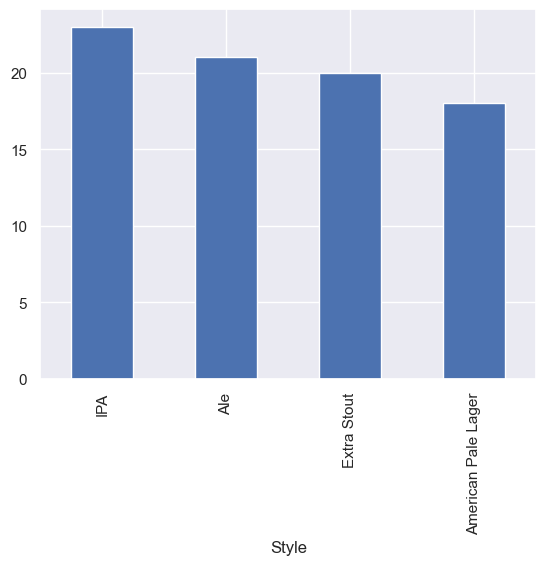

In [3]:
# unique_beer_name = beer_df.style_group.unique()
unique_beer_name = beer_df.Style.unique()
print('Unique beer_names:', unique_beer_name)
print('# of Unique beer_names:', len(unique_beer_name))

print(beer_df["Style"].value_counts())

beer_df["Style"].value_counts().plot(kind = 'bar')

In [4]:
styles = (beer_df["Style"].value_counts()).keys()
print(styles)

Index(['IPA', 'Ale', 'Extra Stout', 'American Pale Lager'], dtype='object', name='Style')


In [5]:
# split the data into abv, ibu, beer_name, and style as float values

abv_flt = beer_df['abv'].astype(float)
ibu_flt = beer_df['ibu'].astype(float)
temp_flt = beer_df['temp [F]'].astype(float)
ph_flt = beer_df['pH'].astype(float)

# look at organization of data
# print('abv_flt:', abv_flt) 
# print('ibu_flt:', ibu_flt)
print('temp_flt:', temp_flt)
print('ph_flt:', ph_flt)


temp_flt: 0     62.43
1     62.43
2     62.79
3     62.79
4     62.58
      ...  
77      NaN
78      NaN
79      NaN
80      NaN
81      NaN
Name: temp [F], Length: 82, dtype: float64
ph_flt: 0     3.72
1     3.71
2     3.72
3     3.72
4     3.72
      ... 
77    4.40
78    4.40
79    4.42
80    4.41
81    4.40
Name: pH, Length: 82, dtype: float64


In [6]:
whos

Variable           Type         Data/Info
-----------------------------------------
MinMaxScaler       type         <class 'sklearn.preproces<...>sing._data.MinMaxScaler'>
abv_flt            Series       0     4.8\n1     4.8\n2  <...>ength: 82, dtype: float64
beer_df            DataFrame         #          Beer Name<...>n\n[82 rows x 16 columns]
ibu_flt            Series       0     10.0\n1     10.0\n2<...>ength: 82, dtype: float64
make_blobs         function     <function make_blobs at 0x000001F1447B7940>
np                 module       <module 'numpy' from 'C:\<...>ges\\numpy\\__init__.py'>
pd                 module       <module 'pandas' from 'c:<...>es\\pandas\\__init__.py'>
ph_flt             Series       0     3.72\n1     3.71\n2<...>ength: 82, dtype: float64
plt                module       <module 'matplotlib.pyplo<...>\\matplotlib\\pyplot.py'>
re                 module       <module 're' from 'c:\\Us<...>\\EE595-Lab\\lib\\re.py'>
sns                module       <module 'seaborn

In [7]:
def CompareTwoFeatures(xParam, yParam):
    ''' Plots comparison of two beer features both in separate and combined plots '''
    fig, axes = plt.subplots(2, 2, sharex = True, sharey = True, figsize=(10,10)) # One beer style by figure  
    fig, global_ax = plt.subplots(figsize=(12,12)) # All beers styles in one figure.
    x_max = beer_df[xParam].max() # Get the max ibu value
    y_max = beer_df[yParam].max() # Get the max abv value

    for style, ax in zip(styles, axes.ravel()):
        ibu_data = beer_df[xParam][beer_df["Style"] == style].values
        abv_data = beer_df[yParam][beer_df["Style"] == style].values
        
        ax.set_title(style)
        ax.plot(ibu_data, abv_data, marker = 'o', linestyle = '')
        ax.legend(numpoints=1, loc='lower right', fontsize = 10)

        global_ax.plot(ibu_data, abv_data, marker = 'o', label = style, linestyle = '')

    global_ax.legend(numpoints=1, loc='lower right', fontsize = 10)

    plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


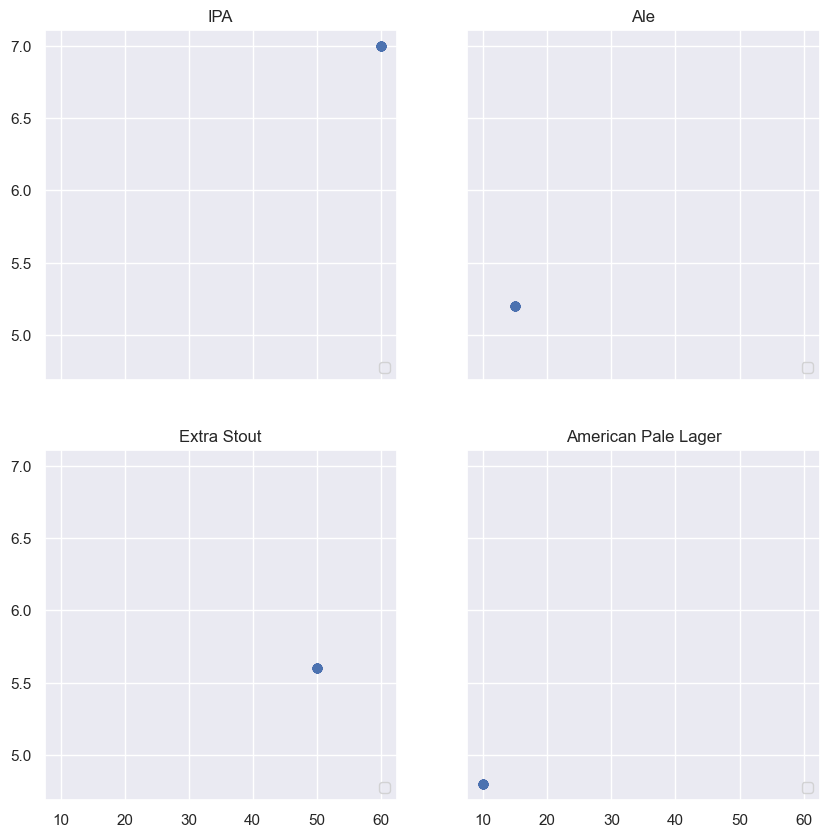

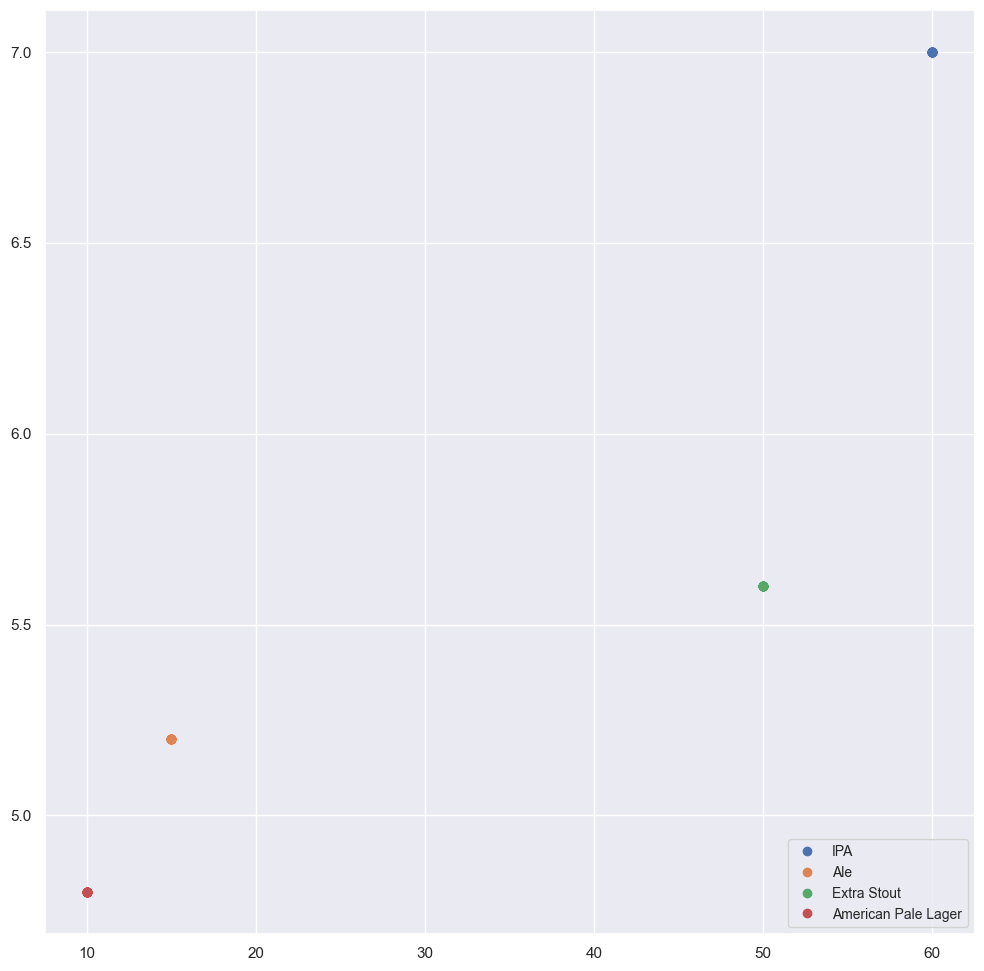

In [8]:
CompareTwoFeatures("ibu", "abv")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


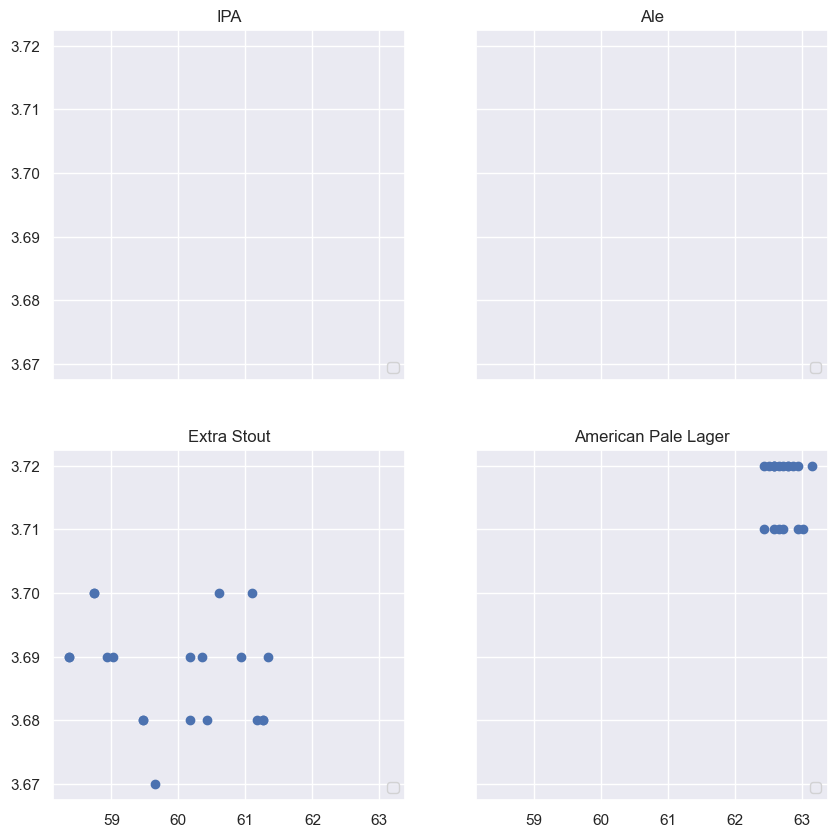

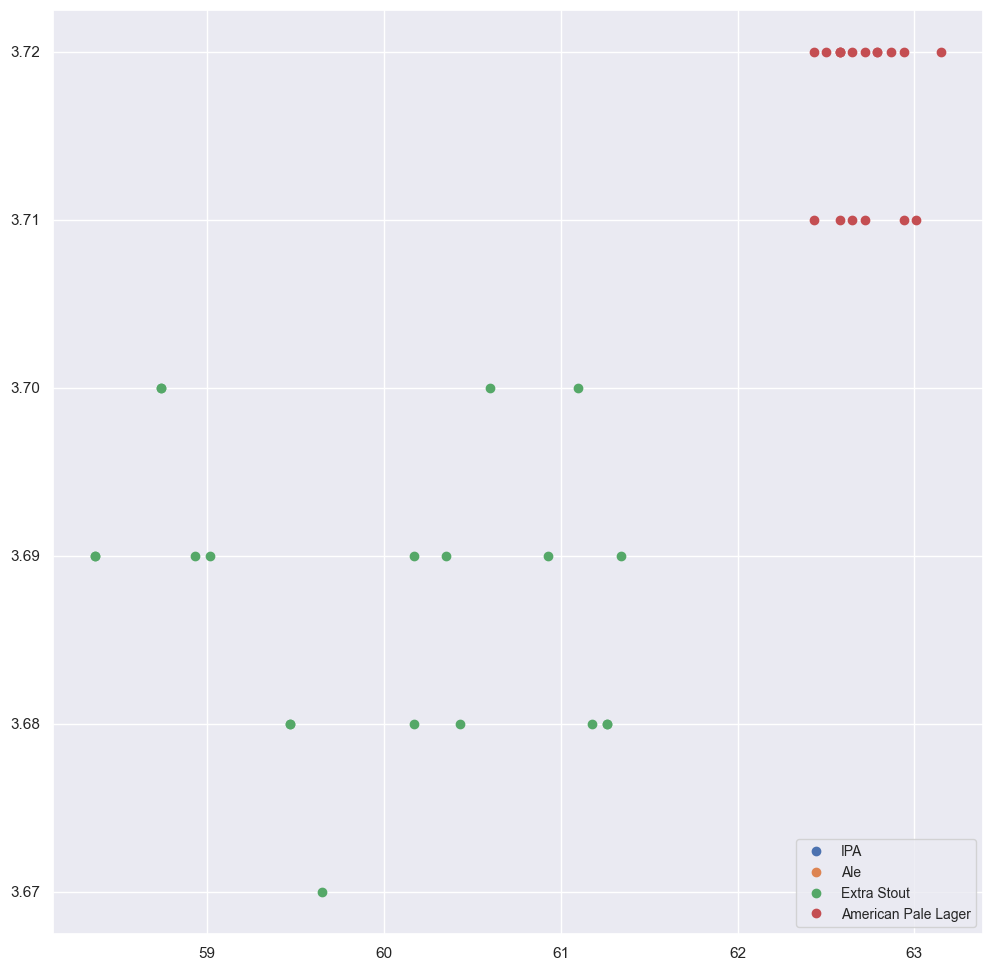

In [9]:
CompareTwoFeatures("temp [F]", "pH")

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


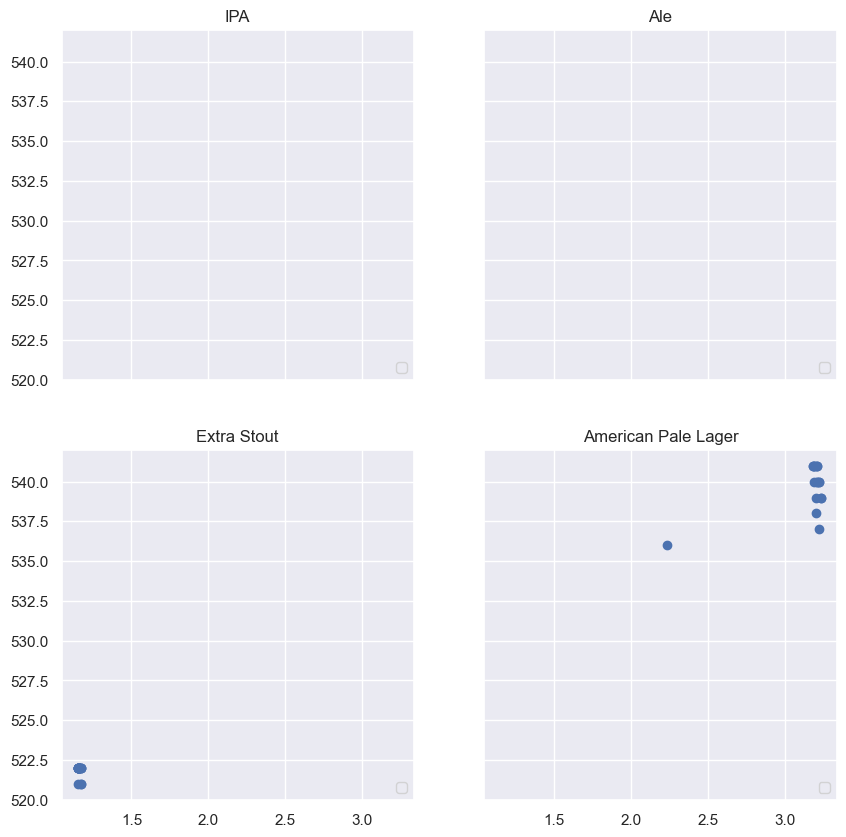

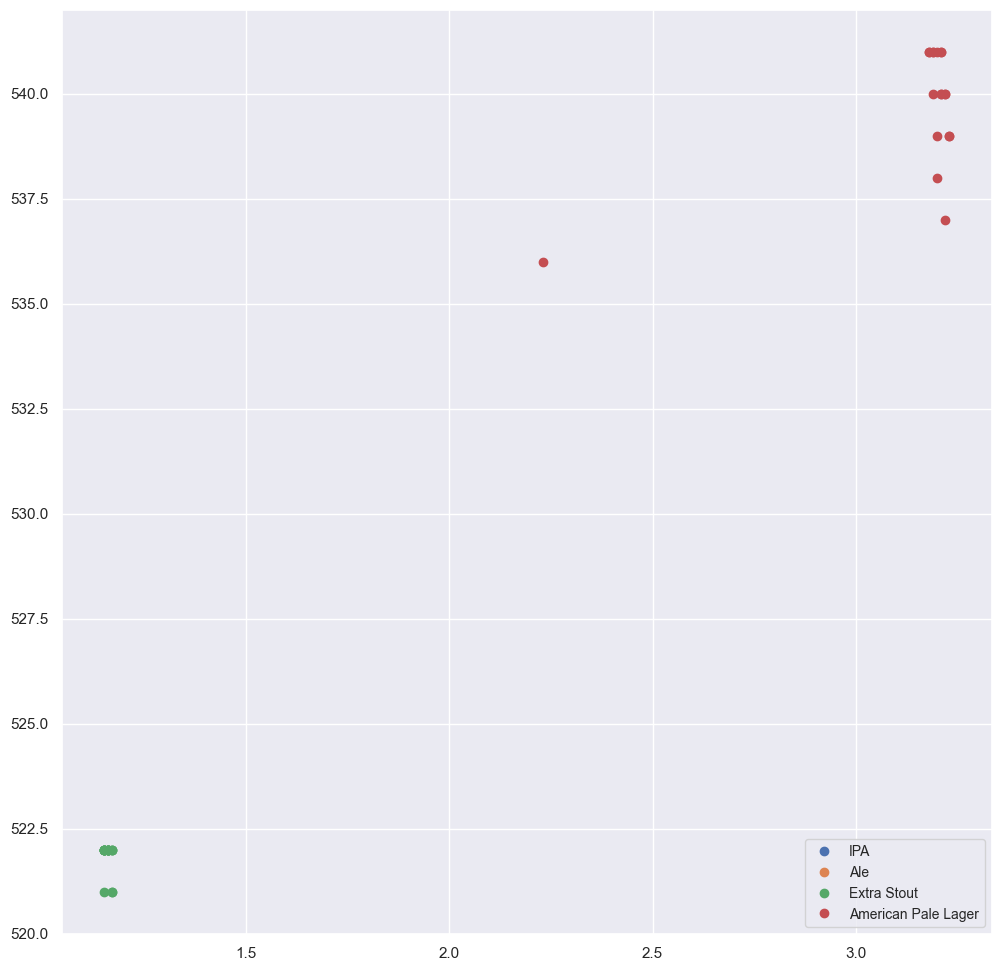

In [11]:
CompareTwoFeatures("turb_v", "acl [ppm]")

From the scatter plot of the raw data, and the histograms it is evident that the abv data is very collected in a very small range. In order to distinguish the data, min-max scaling will be used.

REASON: Features with higher ranging numbers contribute more to distance metrics hence the decision of the ML algorithms will be influenced more by the high magnitude features. 

In [14]:
# encode the styles list text --> numeric values
styles = list(beer_df['Style'])

styleDict = beer_df['Style'].to_dict()

styles_set = set(styles)
stylesList = list(styles_set)

print(stylesList)

['Ale', 'Extra Stout', 'American Pale Lager', 'IPA']


In [16]:
# use min-max scaling
# y = (x – min) / (max – min)

NUMSTYLES = 4

temp_flt_array = temp_flt.to_numpy()
temp_flt_reshaped = temp_flt_array.reshape(-1, 1)

temp_flt_minmax = MinMaxScaler().fit_transform(temp_flt_reshaped)

ph_flt_array = ph_flt.to_numpy()
ph_flt_reshaped = ph_flt_array.reshape(-1, 1)
ph_flt_minmax = MinMaxScaler().fit_transform(ph_flt_reshaped)

colors = []

for beer in styleDict.values():
    for i in range(NUMSTYLES):
        if beer == stylesList[i]:
            colors.append(i)

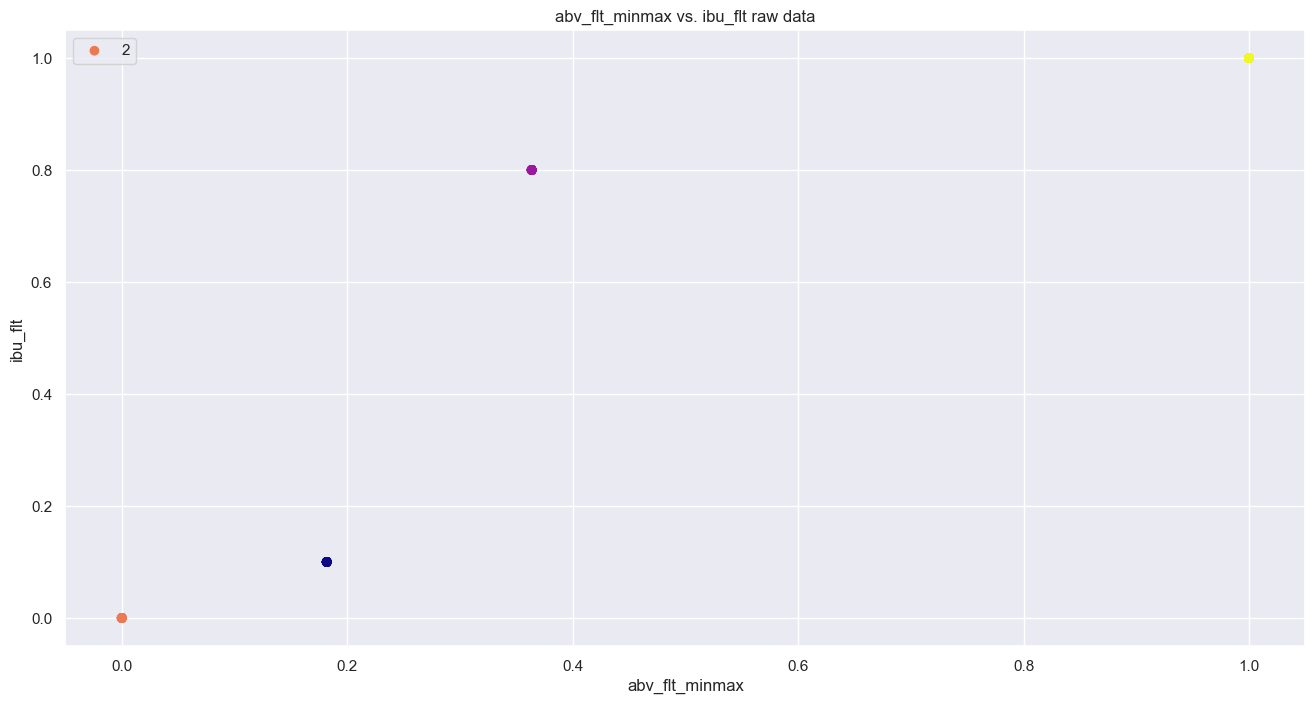

In [17]:
plt.figure(figsize=(16,8))
plt.scatter(x=abv_flt_minmax, y=ibu_flt_minmax, c=colors, cmap='plasma')
plt.title('abv_flt_minmax vs. ibu_flt raw data')
plt.xlabel('abv_flt_minmax')
plt.ylabel('ibu_flt')
plt.legend(colors)

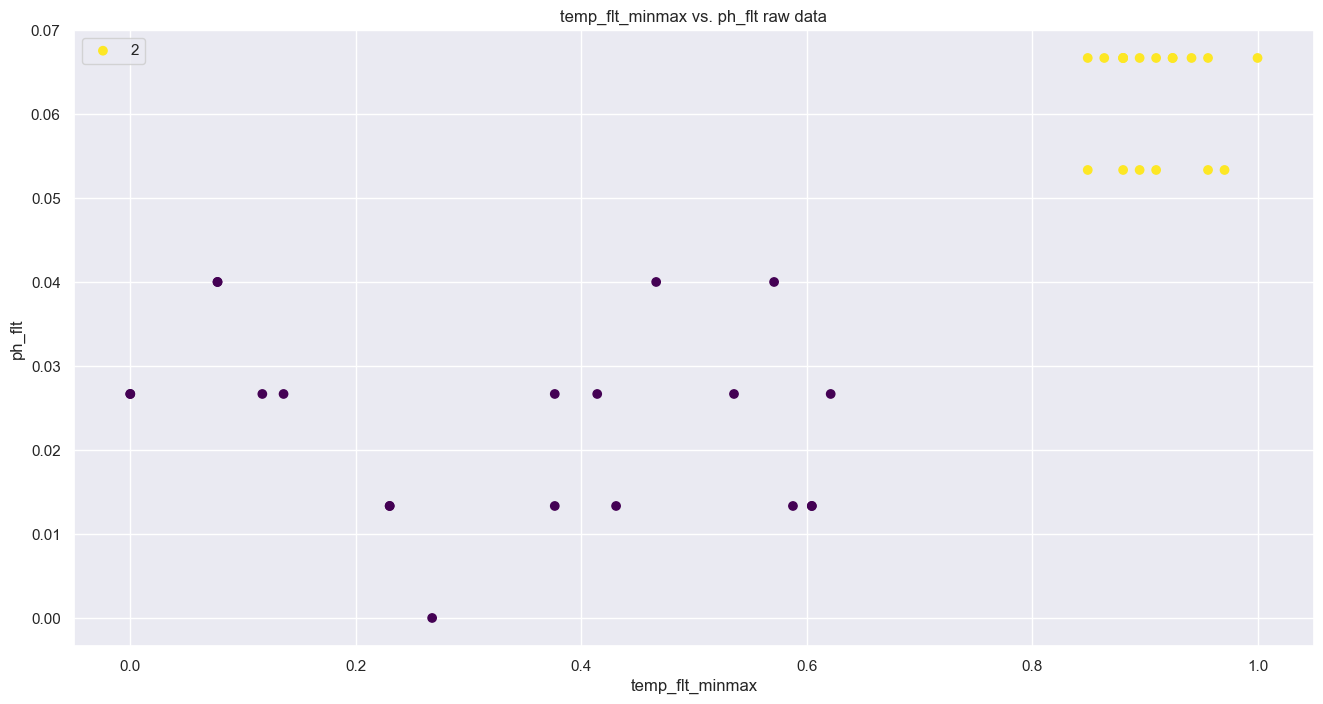

In [18]:
plt.figure(figsize=(16,8))
plt.scatter(x=temp_flt_minmax, y=ph_flt_minmax, c=colors, cmap='viridis')
plt.title('temp_flt_minmax vs. ph_flt raw data')
plt.xlabel('temp_flt_minmax')
plt.ylabel('ph_flt')
plt.legend(colors)

In [ ]:
# Try  standard scaler
# from sklearn.preprocessing import StandardScaler
# StandardScaler()

In [ ]:
# Try assign colors to data points in scatter plot
# Try K means and Gaussian Mixture models 

In [ ]:
#Create a dataframe 
abv_flt_minmax_reshaped = abv_flt_minmax.reshape(1,-1)
ibu_flt_minmax_reshaped = ibu_flt_minmax.reshape(1,-1)
df_scaled = pd.DataFrame({'abv': abv_flt_minmax_reshaped[0],'ibu': ibu_flt_minmax_reshaped[0]})
df_scaled.head()

In [ ]:
from sklearn.decomposition import PCA

#Extracting features from the df_scaled dataframe
X_feat = df_scaled.iloc[:, :].values
print('X_feat:', X_feat)
# initialize the PCA object
pca = PCA(n_components = 2) # extracts 2 features [maintain same dimension] use 1 to reduce dimension
# transform and fit the feature of the training set
X_PCA = pca.fit_transform(X_feat)
print('X_PCA:', X_PCA)

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(x=X_PCA[:,0], y=X_PCA[:,1], cmap='viridis')
plt.title('PCA dim 1 vs. PCA dim 2')
plt.xlabel('PCA dim 1')
plt.ylabel('PCA dim 2')

In [ ]:
# Import the Kernel PCA class
from sklearn.decomposition import KernelPCA
# initialize the Kernel PCA object
Kernel_pca = KernelPCA(n_components = 2, kernel= "rbf") # extracts 2 features, specify the kernel as rbf, polinomial, linear, or sigmoid
# transform and fit the feature of the training set
X_KPCA = Kernel_pca.fit_transform(X_feat)

In [ ]:
plt.figure(figsize=(16,8))
plt.scatter(x=X_KPCA[:,0], y=X_KPCA[:,1], cmap='viridis')
plt.title('KPCA dim 1 vs. KPCA dim 2')
plt.xlabel('KPCA dim 1')
plt.ylabel('KPCA dim 2')